<a href="https://colab.research.google.com/github/Aoisama11/Aoisama11/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn

Welcome to Titanic Dataset Analysis!
Please upload the Titanic dataset (e.g., train.csv).


Saving train.csv to train.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dataset Statistics:
       PassengerId         Sex         Age       SibSp       Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.352413   2

<ipython-input-1-50383d0a098a>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='Set2')


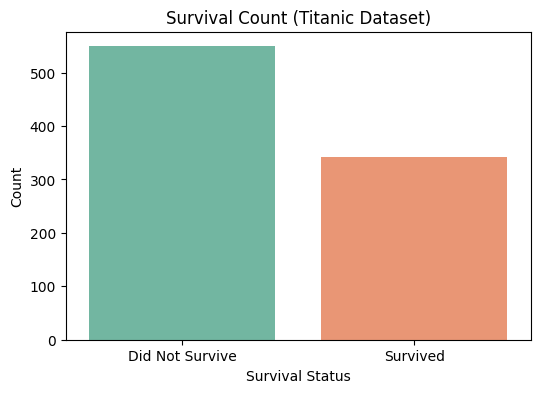

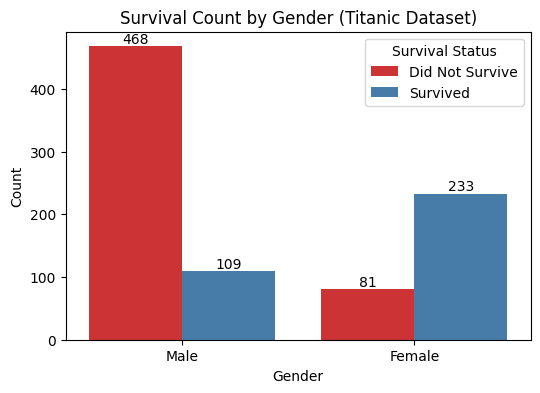

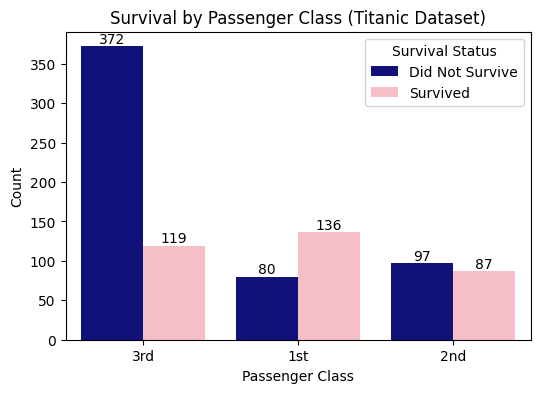

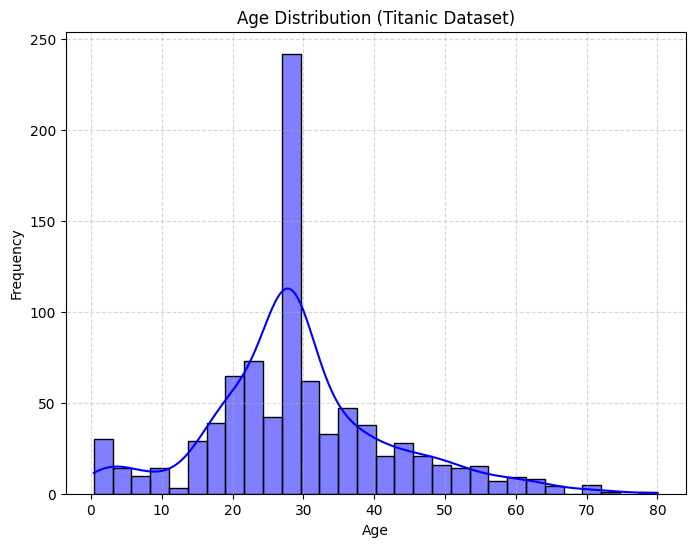

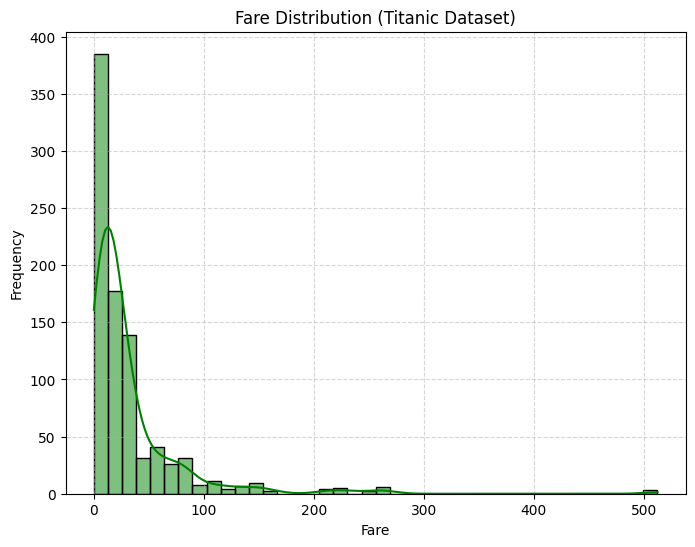

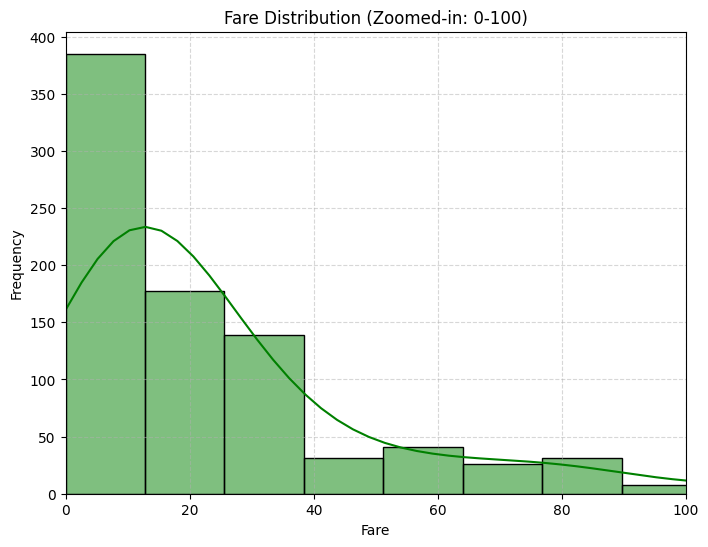

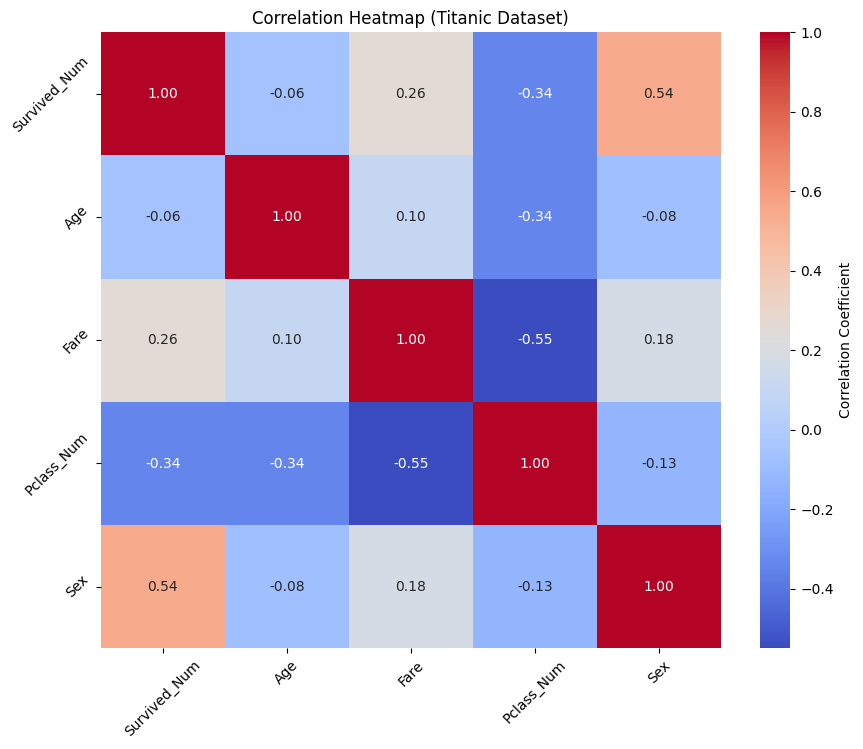

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

def upload_file():
    """
    Prompt the user to upload the Titanic dataset in Google Colab.
    Returns:
        str: The file path of the uploaded file.
    """
    print("Please upload the Titanic dataset (e.g., train.csv).")
    uploaded = files.upload()  # Prompt the user to upload a file
    if not uploaded:
        print("No file uploaded. Exiting...")
        return None
    # Get the file name and return it
    file_name = list(uploaded.keys())[0]
    return file_name

def load_and_clean_data(file_path):
    """
    Load and clean the Titanic dataset.
    Args:
        file_path (str): Path to the dataset file.
    Returns:
        pd.DataFrame: Cleaned Titanic dataset.
    """
    # Load the dataset
    data = pd.read_csv(file_path)

    # Display basic info
    print("Dataset Info:")
    print(data.info())

    # Handle missing values
    # Fill missing 'Age' with the median
    data['Age'] = data['Age'].fillna(data['Age'].median())
    # Fill missing 'Embarked' with the most common value
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    # Drop 'Cabin' column due to excessive missing values
    data.drop(columns=['Cabin'], inplace=True)

    # Convert categorical variables into numerical
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    # Retain original numeric values for 'Survived'
    data['Survived_Num'] = data['Survived']  # Keep numeric version for calculations
    # Map 'Survived' to labels for readability
    data['Survived'] = data['Survived_Num'].map({0: 'Did Not Survive', 1: 'Survived'})

    # Retain original numeric values for 'Pclass'
    data['Pclass_Num'] = data['Pclass']  # Keep numeric version for calculations
    # Map Passenger Class for better readability
    data['Pclass'] = data['Pclass_Num'].map({1: '1st', 2: '2nd', 3: '3rd'})

    # Add Gender column for better visualization
    data['Gender'] = data['Sex'].map({0: 'Male', 1: 'Female'})

    # Remove duplicates
    data.drop_duplicates(inplace=True)

    # Display basic statistics
    print("\nDataset Statistics:")
    print(data.describe())

    return data

def eda_visualizations(data):
    """
    Perform exploratory data analysis (EDA) visualizations on the Titanic dataset.
    Args:
        data (pd.DataFrame): The cleaned Titanic dataset.
    """
    # Visualization 1: Survival Count
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Survived', data=data, palette='Set2')
    plt.title("Survival Count (Titanic Dataset)")
    plt.xlabel("Survival Status")
    plt.ylabel("Count")
    plt.show()

    # Visualization 2: Survival Count by Gender
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=data, x='Gender', hue='Survived', palette='Set1')
    plt.title("Survival Count by Gender (Titanic Dataset)")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    # Update Legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Did Not Survive", "Survived"], title="Survival Status")
    # Add Bar Labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    plt.show()

    # Visualization 3: Survival by Passenger Class
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=data, x='Pclass', hue='Survived', palette=['darkblue', 'lightpink'])
    plt.title("Survival by Passenger Class (Titanic Dataset)")
    plt.xlabel("Passenger Class")
    plt.ylabel("Count")
    # Update Legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Did Not Survive", "Survived"], title="Survival Status")
    # Add Bar Labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    plt.show()

    # Visualization 4: Age Distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Age'], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title("Age Distribution (Titanic Dataset)")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Visualization 5: Fare Distribution (Full Range)
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Fare'], bins=40, kde=True, color='green', edgecolor='black')
    plt.title("Fare Distribution (Titanic Dataset)")
    plt.xlabel("Fare")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Visualization 6: Fare Distribution (Zoomed-in: xlim 0-100)
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Fare'], bins=40, kde=True, color='green', edgecolor='black')
    plt.title("Fare Distribution (Zoomed-in: 0-100)")
    plt.xlabel("Fare")
    plt.ylabel("Frequency")
    plt.xlim(0, 100)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Visualization 7: Correlation Heatmap
    corr = data[['Survived_Num', 'Age', 'Fare', 'Pclass_Num', 'Sex']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title("Correlation Heatmap (Titanic Dataset)")
    plt.show()

def main():
    """
    Main function to run the Titanic dataset EDA in Google Colab.
    """
    print("Welcome to Titanic Dataset Analysis!")

    # Upload the dataset
    file_path = upload_file()
    if not file_path:
        return

    # Load and clean the dataset
    data = load_and_clean_data(file_path)

    # Perform EDA visualizations
    eda_visualizations(data)

if __name__ == "__main__":
    main()